In [8]:
import pandas as pd
from keras.preprocessing.text import one_hot

In [7]:
songs = pd.merge(pd.read_csv('data/songs.csv'),
                 pd.read_csv('data/song_extra_info.csv'),
                 on = 'song_id',
                 how='inner')\
          .set_index('song_id', drop=True)\
          .sample(500000)

members = pd.read_csv('data/members.csv')\
            .set_index('msno', drop=True)

train = pd.read_csv('data/train.csv').sample(200000)

train = train.merge(songs, left_on='song_id', right_index=True)\
             .merge(members, left_on='msno', right_index=True)

### Matrix Factorization

In [17]:
from keras import layers
from keras import models
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [31]:
i_user = layers.Input(shape=(1,), dtype='int32', name='user')
i_song = layers.Input(shape=(1,), dtype='int32', name='song')

embedding_user = layers.Embedding(input_dim=500000, output_dim=64, name='embedding_user')
embedding_user = embedding_user(i_user)
embedding_user = layers.Flatten()(embedding_user)

embedding_song = layers.Embedding(input_dim=500000, output_dim=64, name='embedding_song')
embedding_song = embedding_song(i_song)
embedding_song = layers.Flatten()(embedding_song)

h1 = layers.dot([embedding_user, embedding_song], axes=1)
o = layers.Dense(1, activation='sigmoid')(h1)

model = models.Model(inputs=[i_user, i_song],
                     outputs=o)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

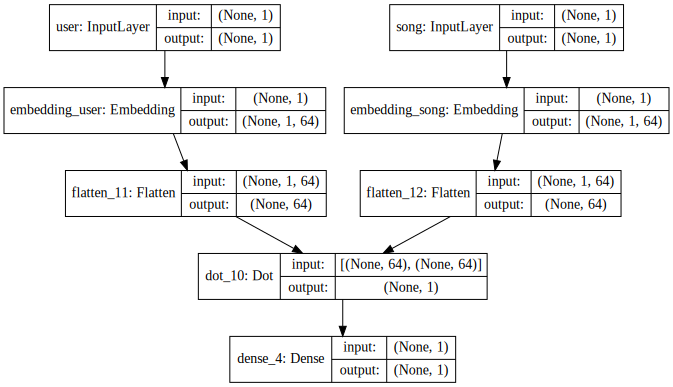

In [32]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [40]:
x_user = train['msno'].apply(lambda r: one_hot(r, filters=' ', n=500000))
x_song = train['song_id'].apply(lambda r: one_hot(r, filters=' ', n=500000))

In [ ]:
model.fit([x_user, x_song],
          train['target'])

Epoch 1/1
